In [1]:
!pip install mtcnn
#!pip install keras_vggface
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-i5ll8ahu
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-i5ll8ahu
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=bdafb4de7f36a735486625e0a14ea9477ea627092d9098eccef953fdbb480bb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-rgf7h5jd/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.0 MB/s 


In [2]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input,decode_predictions
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine 
from os import walk
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

Shape of image/array: (1152, 2048, 3)


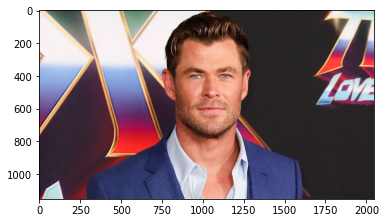

In [3]:
import matplotlib.pyplot as plt
filename = "Image/Chris Hemsworth_1.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [4]:
Input_path = 'Input'
input_file  = [] 
#for (dirpath, dirnames, filenames) in walk(Input_path):
    #print(filenames)
    #input_file.extend(filenames)
    #break
input_filenames = next(walk(Input_path), (None, None, []))[2]
for i in input_filenames:
    filename = Input_path + '/'+i
    input_file.append(filename)

In [5]:
#INPUT_IMAGE = 'Image/Paing Takhon_1.jpg'
INPUT_IMAGE = input_file[0]

#INPUT_IMAGE2 = 'Image/Chris Hemsworth_3.jpg'
#INPUT_IMAGE2 = celebrity[0]
#OUTPUT_IMAGE = 'Test5.png'
detector = MTCNN(steps_threshold=[0.0, 0.0, 0.0])

def landmarks(img):
    faces = detector.detect_faces(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    face = max(faces, key=lambda x: x['confidence'])
    return face['keypoints']

def affineMatrix(lmks, scale=2.5):
    nose = np.array(lmks['nose'], dtype=np.float32)
    left_eye = np.array(lmks['left_eye'], dtype=np.float32)
    right_eye = np.array(lmks['right_eye'], dtype=np.float32)
    eye_width = right_eye - left_eye
    angle = np.arctan2(eye_width[1], eye_width[0])
    center = nose
    alpha = np.cos(angle)
    beta = np.sin(angle)
    w = np.sqrt(np.sum(eye_width**2)) * scale
    m = [[alpha, beta, -alpha * center[0] - beta * center[1] + w * 0.5],
        [-beta, alpha, beta * center[0] - alpha * center[1] + w * 0.5]]
    return np.array(m), (int(w), int(w))
"""
img = cv2.imread(INPUT_IMAGE)
resize_img = cv2.resize(img,dsize=(224,224))
mat, size = affineMatrix(landmarks(resize_img ))
aline_img =  cv2.warpAffine(resize_img, mat, size)
img2 = cv2.imread(INPUT_IMAGE2)
resize_img2 = cv2.resize(img2,dsize=(224,224))
mat2, size2 = affineMatrix(landmarks(resize_img2))
aline_img2 =  cv2.warpAffine(resize_img2, mat2, size2)
"""
# Create the new aligned image 
#cv2.imwrite(OUTPUT_IMAGE, cv2.warpAffine(img, mat, size))

'\nimg = cv2.imread(INPUT_IMAGE)\nresize_img = cv2.resize(img,dsize=(224,224))\nmat, size = affineMatrix(landmarks(resize_img ))\naline_img =  cv2.warpAffine(resize_img, mat, size)\nimg2 = cv2.imread(INPUT_IMAGE2)\nresize_img2 = cv2.resize(img2,dsize=(224,224))\nmat2, size2 = affineMatrix(landmarks(resize_img2))\naline_img2 =  cv2.warpAffine(resize_img2, mat2, size2)\n'

In [68]:
dataset_path = 'Image'
Aline_path = 'Aline'
celebrity_filenames = next(walk(dataset_path), (None, None, []))[2]   
for j in celebrity_filenames:
    filename = dataset_path + '/'+j
    #celebrity.append(filename)
    img = cv2.imread(filename)
    #resize_img = cv2.resize(img,dsize=(224,224))
    resize_img = cv2.resize(img,dsize=(500,500)) # After compress image,face may not clear to show
    mat, size = affineMatrix(landmarks(resize_img ))
    aline_img =  cv2.warpAffine(resize_img, mat, size)
    output_filename = Aline_path+'/'+j
    print(output_filename)
    #aline_img = cv2.resize(aline_img,(500,500)) 
    cv2.imwrite(output_filename, aline_img)

261/261 [==============================] - 15s 56ms/step
Aline/Paing Takhon_1.jpg
264/264 [==============================] - 14s 53ms/step
Aline/Chris Hemsworth_1.jpg
264/264 [==============================] - 13s 48ms/step
Aline/Timothée Chalamet _1.jpg
267/267 [==============================] - 13s 47ms/step
Aline/Chris Hemsworth_3.jpg
265/265 [==============================] - 12s 47ms/step
Aline/Chris Hemsworth_2.jpg
265/265 [==============================] - 13s 47ms/step
Aline/Paing Takhon_3.jpg


In [75]:
img = cv2.imread(INPUT_IMAGE)
resize_img = cv2.resize(img,dsize=(224,224))
mat, size = affineMatrix(landmarks(resize_img ))
aline_img =  cv2.warpAffine(resize_img, mat, size)

48/48 [==============================] - 2s 47ms/step


In [70]:
aline_filenames = next(walk(Aline_path), (None, None, []))[2]   
aline_image=[]
for i in aline_filenames:
    filename = Aline_path+'/'+i
    img = plt.imread(filename)
    aline_image.append(img)

In [50]:
# draw an image with detected objects
def draw_facebox(data,result_list):
    # load the image
    #data = plt.imread(filename)
    # plot the image 
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box 
    for result in result_list:
        # get coordinates
        x,y,width,height = result['box']
        #create the shape
        rect = plt.Rectangle((x,y),width,height,fill = False,color = 'green')
        #draw the box 
        ax.add_patch(rect)
        for key,value in result['keypoints'].items():
            # create and draw dot 
            dot = plt.Circle(value,radius=5,color='red')
            ax.add_patch(dot)
        #show the plot
        plt.show()

47/47 [==============================] - 4s 76ms/step


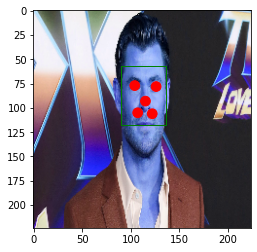

In [ ]:
  faces2 = detector.detect_faces(resize_img2)
  face2 = draw_facebox(resize_img2,faces2)

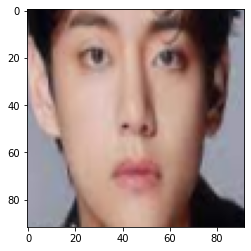

In [76]:
# Fail if the person is in the dark place
#aline_img = aline_image[0]
aline_image_RGB = cv2.cvtColor(aline_img, cv2.COLOR_BGR2RGB)
plt.imshow(aline_image_RGB)
plt.show()

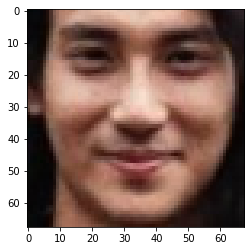

In [77]:
aline_img2 = aline_image[0]
#aline_image_RGB = cv2.cvtColor(aline_img, cv2.COLOR_BGR2RGB)
plt.imshow(aline_img2)
plt.show()

In [78]:
def extract_face(image,resize=(224,224)):
    #image = cv2.imread(image)
    faces = detector.detect_faces(image)
    x1,y1,width,height = faces[0]['box']
    x2,y2 = x1+width,y1+height
    face_boundary = image[y1:y2,x1:x2]
    face_image = cv2.resize(face_boundary,resize)
    return face_image

In [79]:
face_image = extract_face(aline_img)

7/7 [==============================] - 0s 45ms/step


In [80]:
face_image2 = extract_face(aline_img2)

3/3 [==============================] - 0s 37ms/step


In [81]:
def get_embeddings(faces):
    face  = np.asarray(faces,'float32')
    face =  preprocess_input(face,version=2)
    model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')
    yhat = model.predict(face)
    return yhat

In [82]:
def get_similarity(faces):
    embeddings = get_embeddings(faces)
    score = cosine(embeddings[0],embeddings[1])
    
    if score <= 0.5:
       return "Face Matched",score 

    return "Face Not Matched",score

In [83]:
Test_list=[]
Test_list.append(aline_img)
Test_list.append(aline_img2)


In [84]:

#Test_list = ['Paing Takhon_1.jpg','Timothée Chalamet _1.jpg']
images = []
for i in Test_list:
    temp_face = extract_face(i)
    images.append(temp_face)
  
get_similarity(images)

1/1 [==============================] - 1s 1s/step


('Face Not Matched', 0.6382128894329071)